**Import the data. Analyse the dimensions of the data. Visualise the data.**

Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import Libraries

In [30]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


In [31]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

np.seterr(over='ignore')
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

Print Current working Directory

In [33]:
# Check current working directory.
retval = os.getcwd()
print ("Current working directory %s" % retval)

Current working directory /content/drive/My Drive/test


Change the directory to read train images

In [34]:
path='/content/drive/MyDrive/'
os.chdir(path)
retval = os.getcwd()
print ("Current working directory %s" % retval)

Current working directory /content/drive/MyDrive


In [35]:
path='/content/drive/MyDrive/train/'
os.chdir(path)
retval = os.getcwd()
print ("Current working directory %s" % retval)

Current working directory /content/drive/MyDrive/train


Read Train Images and label them as per the subfolder names

In [36]:
# importing cv2  
import cv2 
img=[]
label=[]
for currentpath, folders, files in os.walk('.'):
    for file in files:
      a = cv2.imread(os.path.join(currentpath,file),-1)
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
      a = cv2.resize(a,(128,128))
      img.append(a)
      if currentpath[2:]=='Black-grass':
        label.append(0)
      elif currentpath[2:]=='Charlock':
        label.append(1)
      elif currentpath[2:]=='Cleavers':
        label.append(2)
      elif currentpath[2:]=='Common Chickweed':
        label.append(3)
      elif currentpath[2:]=='Common wheat':
        label.append(4)
      elif currentpath[2:]=='Fat Hen':
        label.append(5)
      elif currentpath[2:]=='Loose Silky-bent':
        label.append(6)
      elif currentpath[2:]=='Maize':
        label.append(7)
      elif currentpath[2:]=='Scentless Mayweed':
        label.append(8)
      elif currentpath[2:]=='Shepherds Purse':
        label.append(9)
      elif currentpath[2:]=='Small-flowered Cranesbill':
        label.append(10)
      elif currentpath[2:]=='Sugar beet':
        label.append(11)


**Display Train images and corresponding labels**

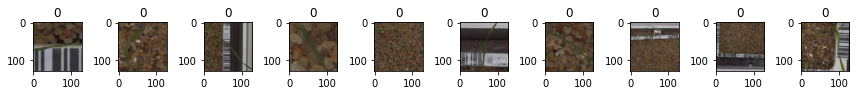

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_img(show,img,label):
    fig, axs = plt.subplots(1, show, figsize=(12, 12))
    fig.tight_layout()
    for i in range(0, show):
      axs[i].imshow(img[i], label=label[i])
      axs[i].set_title(label[i])
show_img(10, img, label)

Change the directory to read test images

In [38]:
path='/content/drive/MyDrive/test/'
os.chdir(path)
retval = os.getcwd()
print ("Current working directory %s" % retval)

Current working directory /content/drive/MyDrive/test


In [39]:
# importing cv2  
import cv2 
test_img=[]
test_label=[]
for currentpath, folders, files in os.walk('.'):
    for file in files:
      a = cv2.imread(os.path.join(currentpath,file),-1)
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
      a = cv2.resize(a,(128,128))
      test_img.append(a)
      test_label.append('')

**Display Test images**

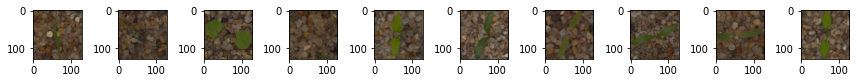

In [40]:
show_img(10, test_img, test_label)

**Train tune and test AIML image classifier model using:**

• Use supervised learning algorithms for training

• Use neural networks for training

• Use CNN for training **

**KNN - Supervised Learning**

Shuffle the data to avoid skewness of the classes

In [42]:
from sklearn.utils import shuffle
X,y= shuffle(np.array(img),np.array(label), random_state=1)

In [ ]:
# Changing dimensions to N x D X C = 128x128x3
# Number of samples you want in training data. 3562 is max.
N = 3562
x_tr = []
for i in range(N):
    x_tr.append(X[i,:].flatten())

In [ ]:
len(x_tr)

3562

**The train is very fast as we do not have any calculation logic, however, prediction is extremely slow, as it iterates for each training data points**

In [ ]:
class KNN:
    def __init__(self):
        pass
    
    # Memorize the training data    
    def train(self, X, y):
        self.tr_x = X
        self.tr_y = y
        
    # For the test image:
    #  find nearest train image with minimum distance from the test image
    #  predict the label of nearest training image
    def predict(self, x):
        # x is of size D = 128x128x3 for which we want to predict the label
        # returns the predicted label for the input x
        min_idx = None
        min_dist = 100000000
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                dist += abs(float((self.tr_x[test_sample][each_value] - x[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx]   

In [ ]:
classifier = KNN()
classifier.train(x_tr, y)

In [ ]:
X_test,y_test= shuffle(np.array(test_img),np.array(test_label), random_state=1)
x_te =[]
for i in range(3):
  x_te.append(X_test[i,:].flatten())

In [ ]:
y_predict=[]
for i in range (0,len(x_te)):
  y_predict.append(classifier.predict(x_te[i]))

In [ ]:
y_predict

[6, 6, 3]

**The KNN is a supervised learning algorithm which memorizes the training data
While predicting the label for any image, it simple iterates untill it gets an image in the train data with the minimum distance between the two points.**

I have predicted the above 3 image labels. I couldn't run the prediction for all the test images as it is taking too much time.Looking at the classification results, the accuracy is not at all good.CNN works best for image classification, however before building CNN, following is DNN built for the same data.*





**DNN Model**

Train Test Split - I am taking out some percentage of data out of the train images for validation

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3562, 128, 128, 3), (1188, 128, 128, 3), (3562,), (1188,))

Normalize inputs from 0-255 to 0-1

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

One hot encode outputs

In [16]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 12


Changing dimensions to N x D X C = 128x128x3

Number of samples you want in training data. 3562 is max.

In [17]:
N = 3562
x_tr = []
for i in range(N):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(1188):
    x_te.append(X_test[i,:].flatten())

In [18]:
len(x_tr),len(x_te),len(x_tr[0]),len(x_te[0])

(3562, 1188, 49152, 49152)

Define model

In [23]:
# no.of classes
num_classes = y_test.shape[1]


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Dropout

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(1000, activation='relu')) ###Multiple Dense units with Relu activation
    #model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

Build the model

In [24]:
model = nn_model()

Compile model

In [25]:
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

Fit the model

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
12/12 - 13s - loss: 12.0554 - accuracy: 0.1044 - val_loss: 5.4966 - val_accuracy: 0.0976
Epoch 2/100
12/12 - 11s - loss: 4.1328 - accuracy: 0.1002 - val_loss: 2.6548 - val_accuracy: 0.1364
Epoch 3/100
12/12 - 11s - loss: 2.4803 - accuracy: 0.1404 - val_loss: 2.4361 - val_accuracy: 0.0951
Epoch 4/100
12/12 - 11s - loss: 2.3847 - accuracy: 0.1679 - val_loss: 2.3803 - val_accuracy: 0.1776
Epoch 5/100
12/12 - 11s - loss: 2.3367 - accuracy: 0.2077 - val_loss: 2.3638 - val_accuracy: 0.1801
Epoch 6/100
12/12 - 11s - loss: 2.3150 - accuracy: 0.1985 - val_loss: 2.3715 - val_accuracy: 0.1473
Epoch 7/100
12/12 - 11s - loss: 2.2985 - accuracy: 0.2165 - val_loss: 2.3553 - val_accuracy: 0.2247
Epoch 8/100
12/12 - 11s - loss: 2.2546 - accuracy: 0.2445 - val_loss: 2.2657 - val_accuracy: 0.2559
Epoch 9/100
12/12 - 11s - loss: 2.2307 - accuracy: 0.2263 - val_loss: 2.2470 - val_accuracy: 0.2180
Epoch 10/100
12/12 - 11s - loss: 2.2062 - accuracy: 0.2454 - val_loss: 2.2495 - val_accuracy: 0.227

Final evaluation of the model

In [27]:
scores = model.evaluate(X_test, y_test, verbose=0)

print("Error: %.2f%%" % (100-scores[1]*100))

model.summary()

Error: 53.28%
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              49153000  
_________________________________________________________________
dense_6 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 12)                396       
Total params: 49,428,180
Trainable params: 49,428,180
Non-trainable params: 0
____________________________

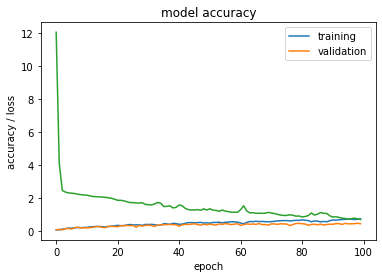

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

The model is underfit. I am going to build a CNN for this image classification problem. CNN works best as image classifier.

**CNN Model**

In [43]:
from sklearn.model_selection import train_test_split
X_train_cnn,X_test_cnn,y_train_cnn,y_test_cnn=train_test_split(X,y,random_state=1)
X_train_cnn.shape,X_test_cnn.shape,y_train_cnn.shape,y_test_cnn.shape

((3562, 128, 128, 3), (1188, 128, 128, 3), (3562,), (1188,))

In [44]:
# normalize inputs from 0-255 to 0-1
X_train = X_train_cnn / 255.0
X_test = X_test_cnn / 255.0

In [45]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train_cnn = to_categorical(y_train_cnn)
y_test_cnn = to_categorical(y_test_cnn)

# no.of classes
num_classes = y_test_cnn.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 12


In [46]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential


nb_epochs= 50
rows, cols=128, 128
n_channels=3
n_pool=2
n_conv=3
n_classes=12
n_filters=64
def CNN_model():
  cnn_model = Sequential()
  cnn_model.add(Conv2D(n_filters, (n_conv,n_conv), activation="relu", input_shape=(rows, cols, n_channels)))
  cnn_model.add(layers.MaxPooling2D(n_pool,n_pool))
  cnn_model.add(Conv2D(n_filters, (n_conv,n_conv), activation="relu"))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(n_classes, activation="softmax"))
  return cnn_model

In [47]:
cnn=CNN_model()
sgd=optimizers.Adam(lr=1e-3)

# Compile the model
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

In [48]:
X_train.shape,y_train_cnn.shape,X_test.shape,y_test_cnn.shape

((3562, 128, 128, 3), (3562, 12), (1188, 128, 128, 3), (1188, 12))

In [49]:
# Fit the model
history=cnn.fit( x=X_train, y=y_train_cnn, batch_size=32, epochs=nb_epochs, validation_data = (X_test,y_test_cnn), verbose=2)

Epoch 1/50
112/112 - 110s - loss: 1.8449 - accuracy: 0.3883 - val_loss: 1.2728 - val_accuracy: 0.5598
Epoch 2/50
112/112 - 109s - loss: 1.1431 - accuracy: 0.6190 - val_loss: 1.0863 - val_accuracy: 0.6330
Epoch 3/50
112/112 - 109s - loss: 0.9526 - accuracy: 0.6870 - val_loss: 1.2197 - val_accuracy: 0.6002
Epoch 4/50
112/112 - 110s - loss: 0.7947 - accuracy: 0.7372 - val_loss: 0.9949 - val_accuracy: 0.6785
Epoch 5/50
112/112 - 110s - loss: 0.5810 - accuracy: 0.8248 - val_loss: 1.0011 - val_accuracy: 0.6692
Epoch 6/50
112/112 - 110s - loss: 0.4345 - accuracy: 0.8636 - val_loss: 1.0769 - val_accuracy: 0.6667
Epoch 7/50
112/112 - 110s - loss: 0.3444 - accuracy: 0.8981 - val_loss: 1.1227 - val_accuracy: 0.6726
Epoch 8/50
112/112 - 109s - loss: 0.2460 - accuracy: 0.9259 - val_loss: 1.1741 - val_accuracy: 0.6734
Epoch 9/50
112/112 - 110s - loss: 0.1561 - accuracy: 0.9579 - val_loss: 1.2634 - val_accuracy: 0.6582
Epoch 10/50
112/112 - 110s - loss: 0.1110 - accuracy: 0.9705 - val_loss: 1.6420 - 

In [51]:
# Final evaluation of the model
scores = cnn.evaluate(X_test, y_test_cnn, verbose=0)

print("Error: %.2f%%" % (100-scores[1]*100))

cnn.summary()

Error: 34.51%
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                2857740   
Total params: 2,896,460
Trainable params: 2,896,460
Non-trainable params: 0
_________________________________________________________________


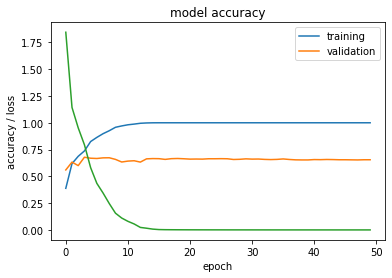

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
from sklearn.utils import shuffle
X= shuffle(np.array(test_img),random_state=1)

In [ ]:
# normalize inputs from 0-255 to 0-1
X= X / 255.0

In [ ]:
#cnn.evaluate(X_test, y_test_cnn)
y_predict_cnn=cnn.predict_classes(X)


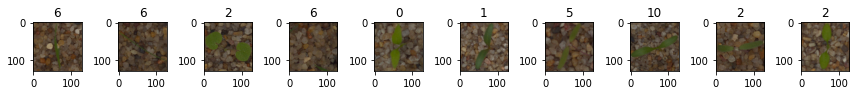

In [ ]:
show_img(10, test_img, y_predict_cnn)

**Pickle the best performing model**

In [54]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(cnn,open(filename, 'wb'))
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test_cnn)
print(result)

TypeError: ignored

**As Pickle is not working, I am using the following approach**

In [58]:
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [64]:
from keras.models import model_from_json 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


**TASK: Explain in depth why CNN out performs neural networks which in turn out perform supervised learning
models when it comes to image classification. Use the markdown option in Jupiter for your answer.**

When it comes to working with images, CNN is considered to be more powerful than ANN, RNN. RNN includes less feature compatibility when compared to CNN. 
The convolution and the pooling units works well for images as they help reducing the total number of units in a neural network (since they are many-to-one mappings). This means, there are fewer parameters to learn which reduces the chance of overfitting as the model would be less complex than a fully connected network.
CNNs are used for image classification and recognition because of its high accuracy. The CNN follows a hierarchical model which gives out a fully-connected layer.

*DOMAIN: Automobile*

*• CONTEXT: A brand research company wants to understand which cars or car manufacturers are popular in a
certain area of the city or locality. Company has a team which takes pictures of the cars randomly through the
day. Using this the company wants to set up an automation which can classify the make of the car once the
picture has been given as an input.*

**• TASK: Help to build the image dataset to be used by the AI team to build an image classifier data. Import and
display the images in python against their labels. Comment on the challenges faced during this task.**

The challenges to create an image datasets include :
1. Good amount of data with Variability is very important
2. Balance of data for every class is challenging
3. Image resolution across the dataset has to be uniform. Preprocessing might be required before training.
4. Also very high resolution images are taking huge amount of time to get trained.


In [55]:
path='/content/drive/MyDrive/Images/'
os.chdir(path)
retval = os.getcwd()
print ("Current working directory %s" % retval)

Current working directory /content/drive/MyDrive/Images


In [56]:
# importing cv2  
import cv2 
img=[]
label=[]
for currentpath, folders, files in os.walk('.'):
    for file in files:
      a = cv2.imread(os.path.join(currentpath,file),-1)
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
      a = cv2.resize(a,(128,128))
      img.append(a)
      label.append('')

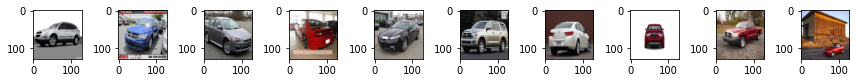

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_img(show,img,label):
    fig, axs = plt.subplots(1, show, figsize=(12, 12))
    fig.tight_layout()
    for i in range(0, show):
      axs[i].imshow(img[i], label=label[i])
      axs[i].set_title(label[i])
show_img(10, img, label)